# PCA

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.decomposition as skd
import seaborn as sns
import pickle as pkl

In [27]:
df = pd.read_csv('data/cleaned_data.csv')


In [36]:
df.head()

,srch_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_brand_bool,prop_location_score1,prop_log_historical_price,price_usd,promotion_flag,...,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,random_bool,weekday,part_of_day,last_minute,season_booking,rating
0,1,187,219,893,3,1,2.83,4.95,104.77,0,...,4,0,1,1,1,3,1,1,0,0.0
1,1,187,219,10404,4,1,2.20,5.03,170.74,0,...,4,0,1,1,1,3,1,1,0,0.0
2,1,187,219,21315,3,1,2.20,4.92,179.80,0,...,4,0,1,1,1,3,1,1,0,0.0
3,1,187,219,27348,2,1,2.83,4.39,602.77,0,...,4,0,1,1,1,3,1,1,0,0.0
4,1,187,219,29604,4,1,2.64,4.93,143.58,0,...,4,0,1,1,1,3,1,1,0,0.0


In [37]:
#Drop the target variable
dropped_cols = df[['rating']]
df = df.drop(columns=['rating'], axis=1)
var_threshhold = 0.95

<Axes: >

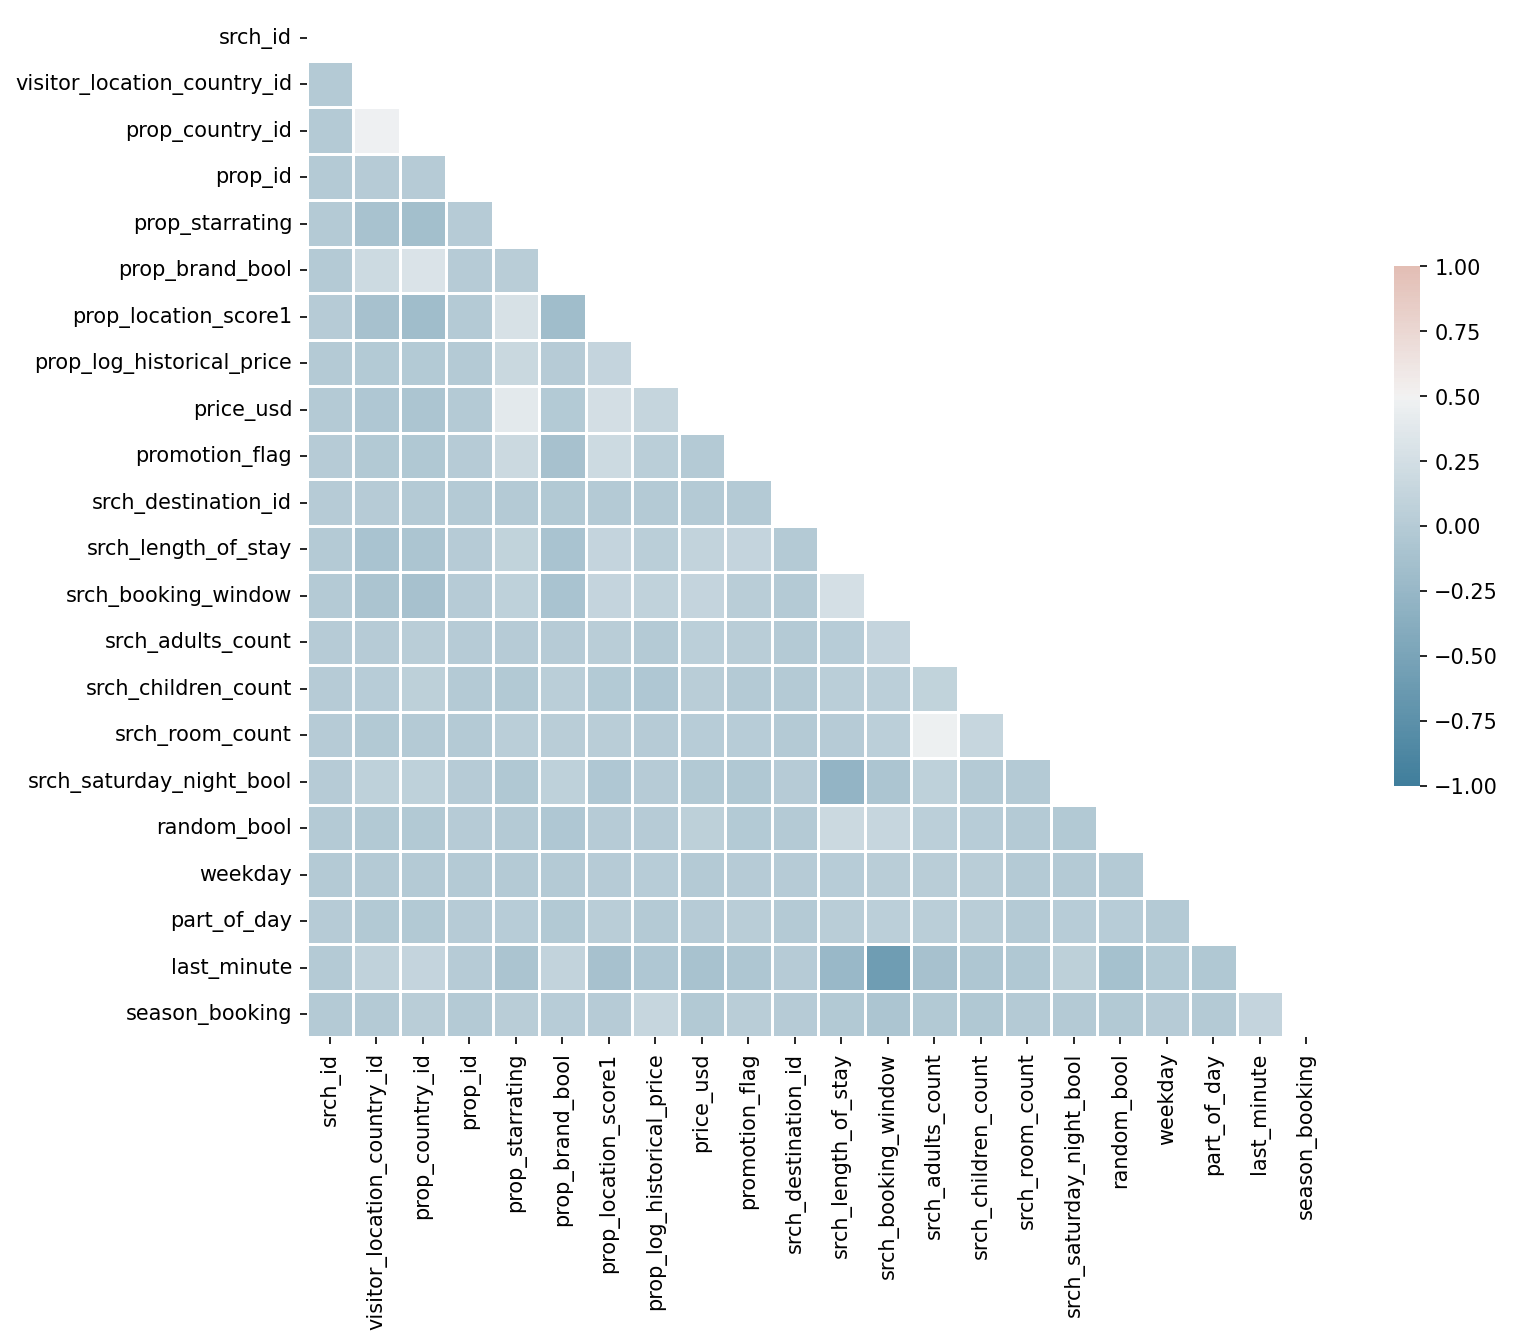

In [38]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [39]:
len(corr_matrix)

22

In [40]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [47]:
pca = skd.PCA(n_components=len(corr_matrix))
df_pca = pca.fit_transform(normalized_df)

for i, x in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    if x > var_threshhold:
        print(f"we can get away with 95% variance by using the first {i+1} components: {x}")
        break
top_components = i+1
top_components
with open("./models/pca.pkl", "wb") as file:
    pkl.dump(pca, file)

we can get away with 95% variance by using the first 14 components: 0.9513851993074431


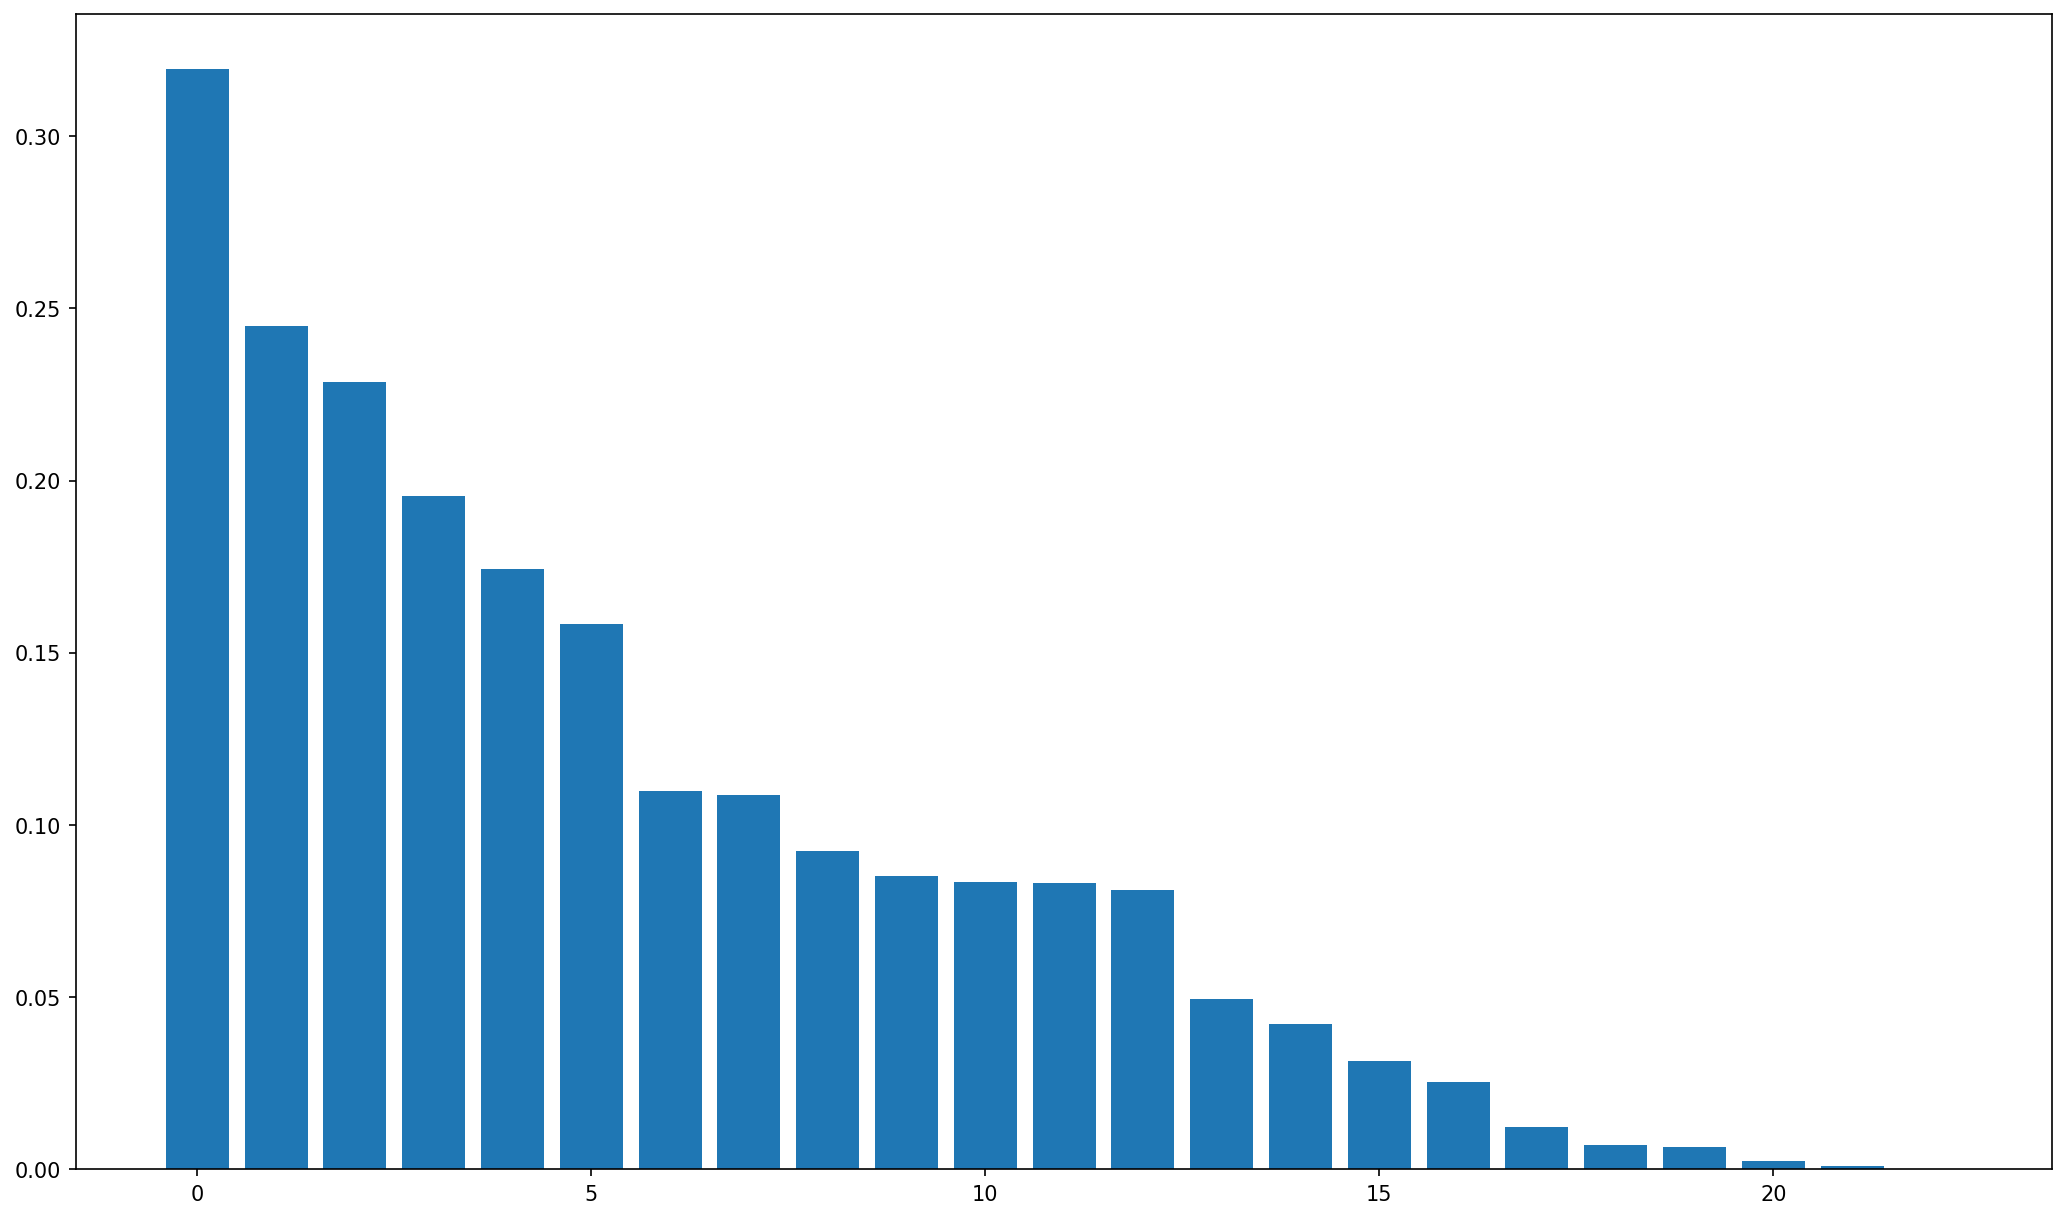

In [32]:
plt.bar(range(0,len(pca.explained_variance_)), pca.explained_variance_)
plt.show()

In [42]:
loadings = pca.components_.T
loadings_column = [f'PC{i}' for i in range(n)]
df_loadings = pd.DataFrame(loadings, columns=loadings_column, index=normalized_df.columns)

In [52]:
df_loadings

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
srch_id,0.002252,0.000064,0.003712,-0.000632,-0.002354,-0.000967,0.015001,-0.001118,-0.027621,0.210827,...,0.001382,-0.003715,0.000391,-0.001107,-0.001888,0.001666,-0.000053,-0.000628,0.000106,2.444589e-07
visitor_location_country_id,-0.151621,-0.047129,-0.112531,-0.027375,0.024366,0.072519,-0.626472,-0.110396,-0.052508,-0.164497,...,-0.013247,-0.406207,0.594530,0.018409,0.011015,0.005948,0.005604,0.003334,0.005602,-3.896322e-04
prop_country_id,-0.210889,-0.058441,-0.180659,-0.023804,0.054925,0.093499,-0.599136,-0.110765,-0.073698,-0.131163,...,0.003405,0.162167,-0.690768,-0.086178,-0.022546,0.010162,-0.017330,0.006574,-0.002137,-6.683082e-04
prop_id,0.000055,-0.000797,-0.001122,0.001858,0.000443,0.004056,0.001027,-0.001559,-0.002730,0.036965,...,-0.203505,-0.001450,-0.002039,0.004955,-0.000003,-0.000128,0.000310,0.000029,-0.000193,3.027502e-04
prop_starrating,0.049515,0.006005,0.002367,-0.050508,0.095394,0.064634,0.192840,0.032518,0.043729,-0.153648,...,-0.020389,-0.534434,-0.173626,-0.774677,-0.003006,-0.000085,0.009068,-0.007794,-0.006865,-2.370209e-02
prop_brand_bool,-0.517412,-0.181812,-0.689291,-0.166385,0.208205,0.132641,0.336075,0.062597,0.009010,0.076635,...,-0.022104,-0.025857,0.059058,0.087008,-0.003799,0.003079,-0.005093,-0.002556,0.002985,1.895543e-04
prop_location_score1,0.107095,0.013699,0.069758,-0.040520,0.064280,0.046440,0.115446,0.020239,0.026354,-0.133773,...,-0.004862,-0.662405,-0.351111,0.616425,-0.010667,-0.014606,0.005114,-0.001296,-0.006744,-9.368413e-03
prop_log_historical_price,0.023942,0.001930,0.011579,-0.002479,0.210925,-0.068430,0.139645,0.041527,0.138478,-0.885751,...,-0.112612,0.251599,0.083446,0.060236,0.008201,-0.018081,0.013907,-0.001955,-0.000348,-2.937348e-03
price_usd,0.003185,-0.001165,-0.001070,-0.000510,0.001283,-0.000465,0.005328,0.000775,0.001967,-0.008166,...,-0.000780,-0.018622,-0.007970,-0.012449,0.004488,0.007484,0.004748,-0.011583,0.019693,9.993480e-01
promotion_flag,0.180964,0.089106,0.193593,-0.224581,0.466015,0.789030,-0.018957,0.006732,0.001014,0.096332,...,-0.005192,0.130550,0.062082,0.022562,-0.002865,0.006290,-0.001051,0.000684,-0.006944,3.620741e-03


[Text(0, 0.5, 'PC0'),
 Text(0, 1.5, 'PC1'),
 Text(0, 2.5, 'PC2'),
 Text(0, 3.5, 'PC3'),
 Text(0, 4.5, 'PC4'),
 Text(0, 5.5, 'PC5'),
 Text(0, 6.5, 'PC6'),
 Text(0, 7.5, 'PC7'),
 Text(0, 8.5, 'PC8'),
 Text(0, 9.5, 'PC9'),
 Text(0, 10.5, 'PC10'),
 Text(0, 11.5, 'PC11'),
 Text(0, 12.5, 'PC12'),
 Text(0, 13.5, 'PC13'),
 Text(0, 14.5, 'PC14'),
 Text(0, 15.5, 'PC15'),
 Text(0, 16.5, 'PC16'),
 Text(0, 17.5, 'PC17'),
 Text(0, 18.5, 'PC18'),
 Text(0, 19.5, 'PC19'),
 Text(0, 20.5, 'PC20'),
 Text(0, 21.5, 'PC21')]

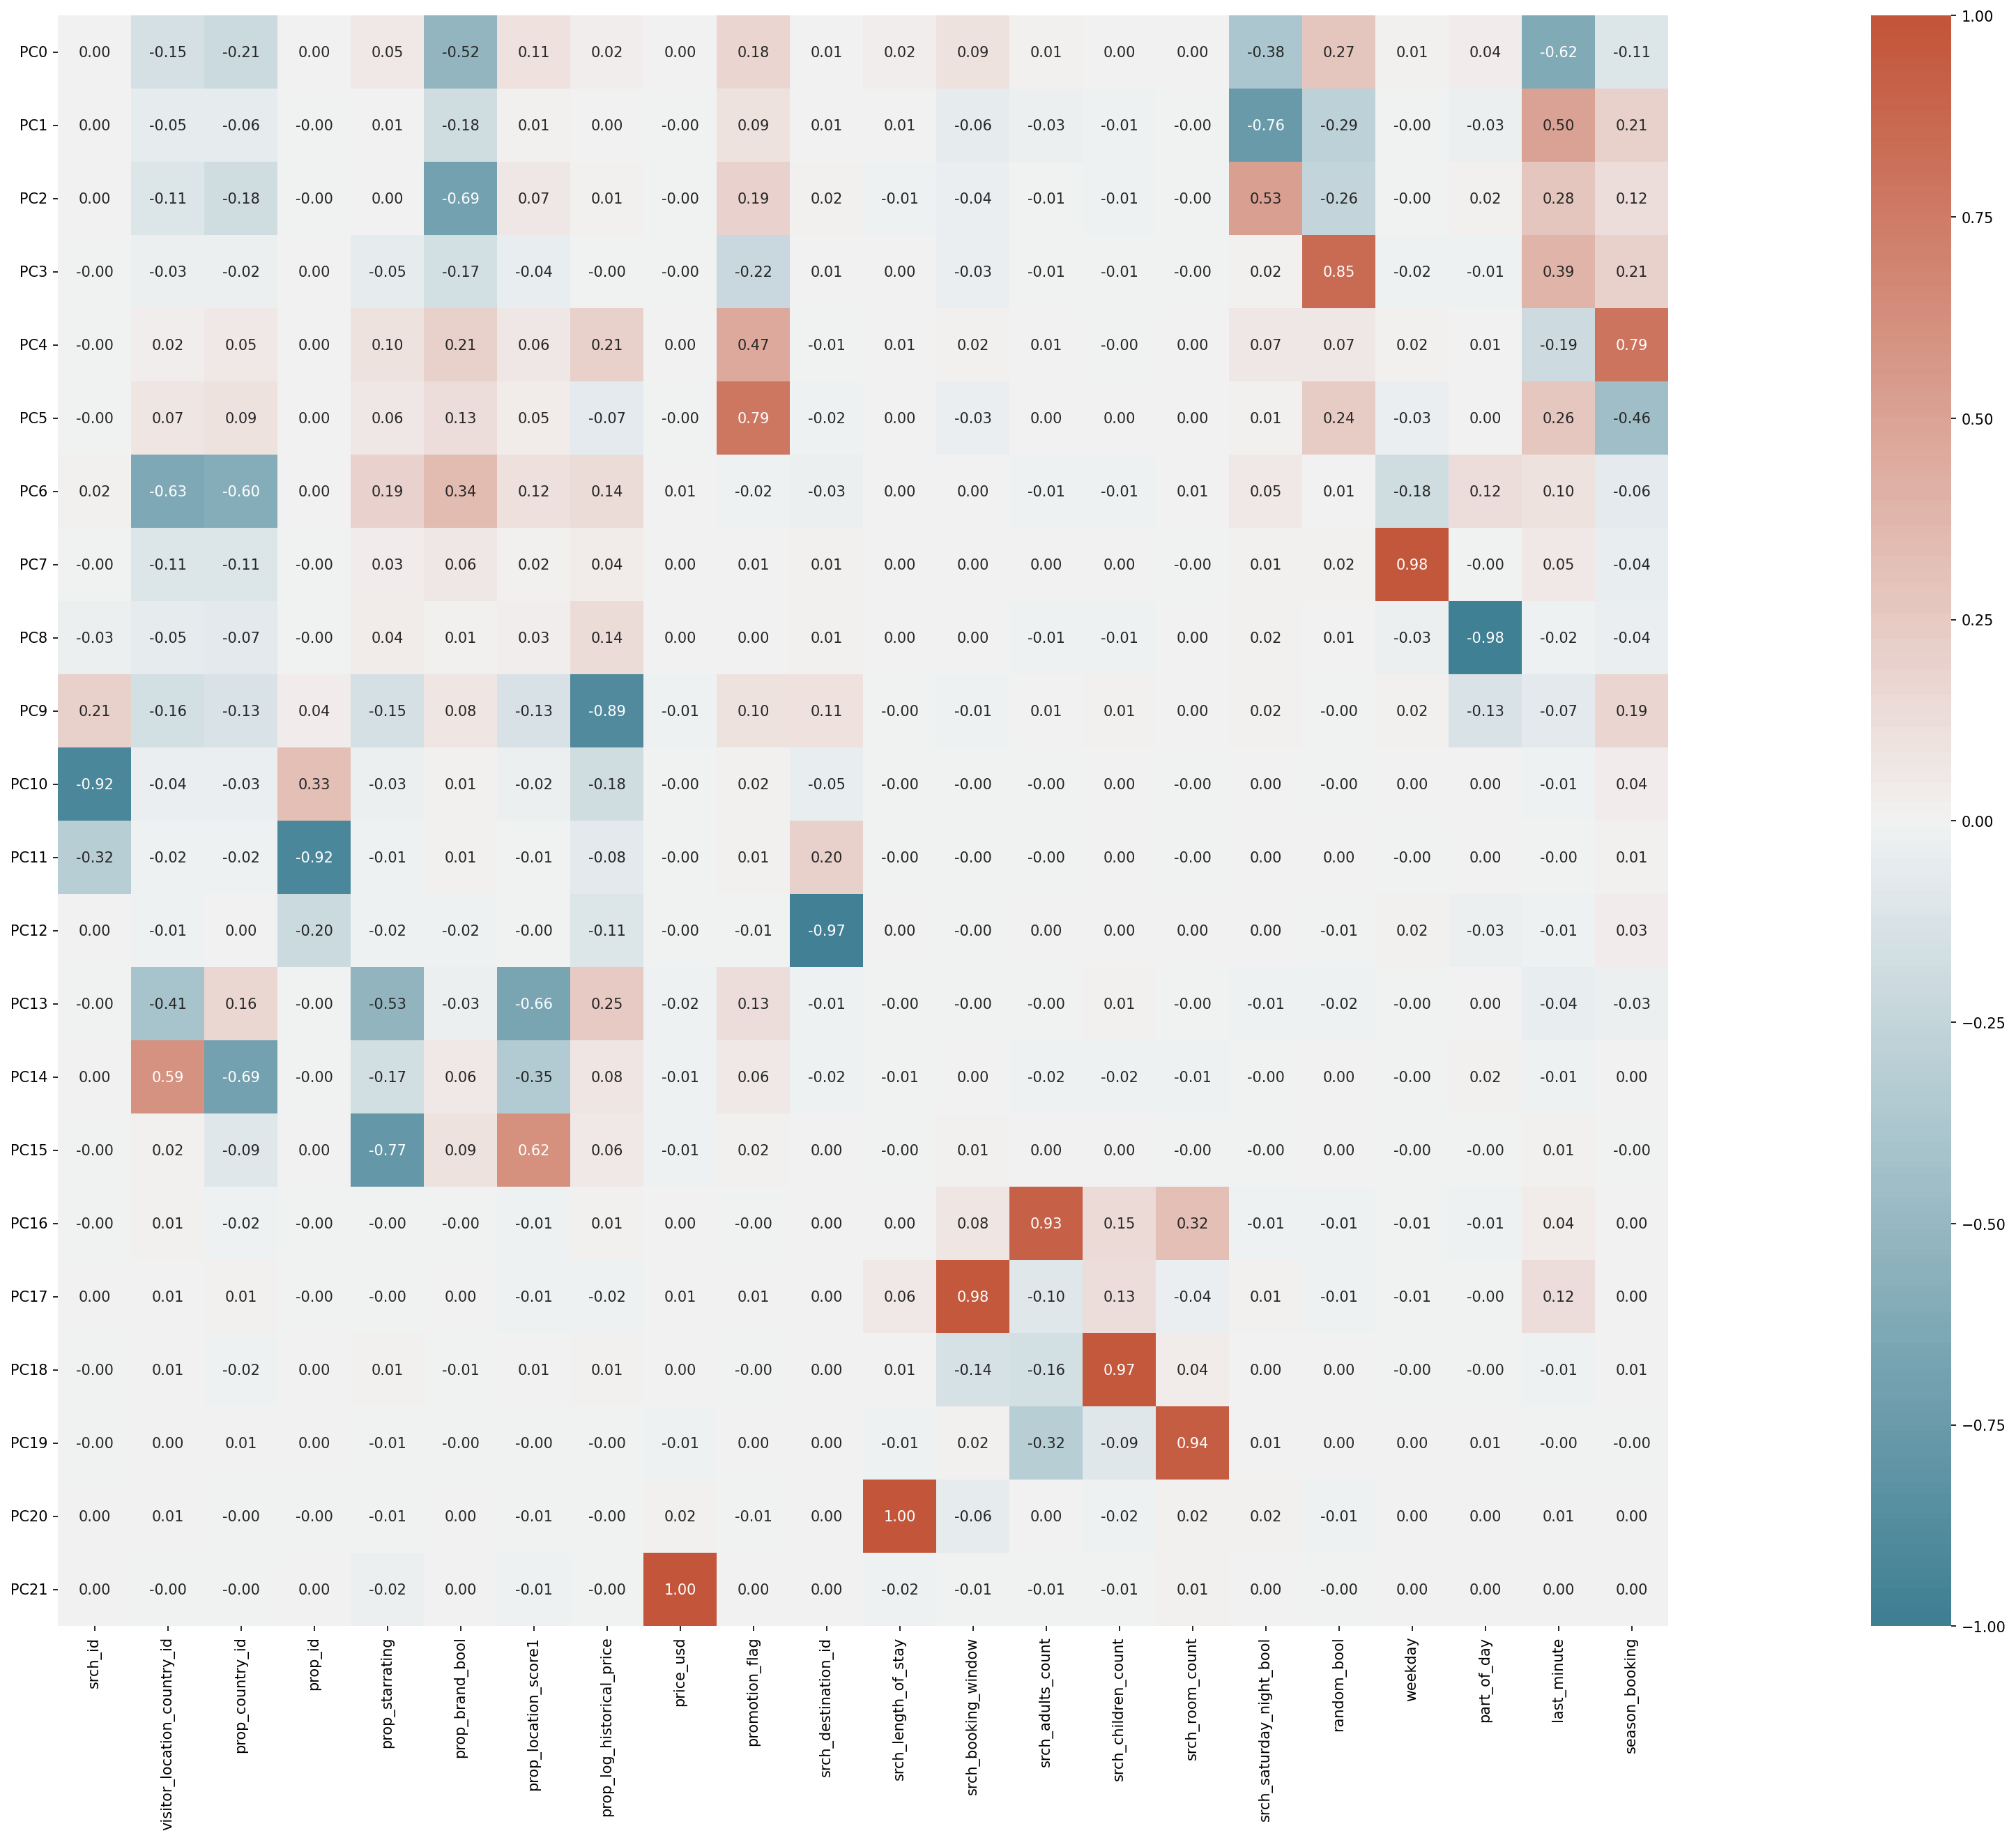

In [44]:
plt.figure(figsize=(50,20))

# plot the heatmap for correlation matrix
ax = sns.heatmap(df_loadings.T, 
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(220, 20, n=200),
                 square=True, annot=True, fmt='.2f')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0)

In [48]:
droppables = []
for row in (pca.components_**2)[:top_components].round(2):
    for val, col in zip(row, df.columns):
        if val > 0 and col not in droppables:
            droppables.append(col)

In [49]:
pd.concat(
    (dropped_cols[[]],
    df.drop(droppables,axis=1),
    pd.DataFrame.from_dict({f'PCA{i+1}':v for i,v in enumerate(df_pca[:,:top_components].transpose())}),
    dropped_cols[['rating']]),
    axis=1
    ).to_csv("./data/cleaned_data_PCA.csv", index=False)

In [50]:
dfcleaned = pd.read_csv('./data/cleaned_data_PCA.csv')
dfcleaned.head()

,price_usd,srch_length_of_stay,srch_adults_count,srch_children_count,srch_room_count,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,rating
0,104.77,1,4,0,1,-0.564865,-0.497224,-0.156020,0.708691,-0.362991,0.391593,0.040163,0.096848,0.269100,-0.278392,0.238515,0.663230,-0.245619,-0.006221,0.0
1,170.74,1,4,0,1,-0.564292,-0.497297,-0.161778,0.702336,-0.346957,0.399717,0.070220,0.101960,0.277081,-0.306022,0.255294,0.597976,-0.264459,-0.050318,0.0
2,179.80,1,4,0,1,-0.574611,-0.498596,-0.162545,0.712625,-0.369737,0.388316,0.029263,0.094601,0.265673,-0.256748,0.288925,0.530539,-0.274155,0.051981,0.0
3,602.77,1,4,0,1,-0.576736,-0.498815,-0.157809,0.719336,-0.400935,0.385572,-0.010502,0.086351,0.247465,-0.161306,0.321114,0.499405,-0.269662,0.076649,0.0
4,143.58,1,4,0,1,-0.557929,-0.496570,-0.157717,0.700077,-0.346245,0.404301,0.075372,0.102353,0.276134,-0.295127,0.301138,0.472944,-0.290696,-0.096265,0.0


In [54]:
len(dfcleaned.columns)

20